In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


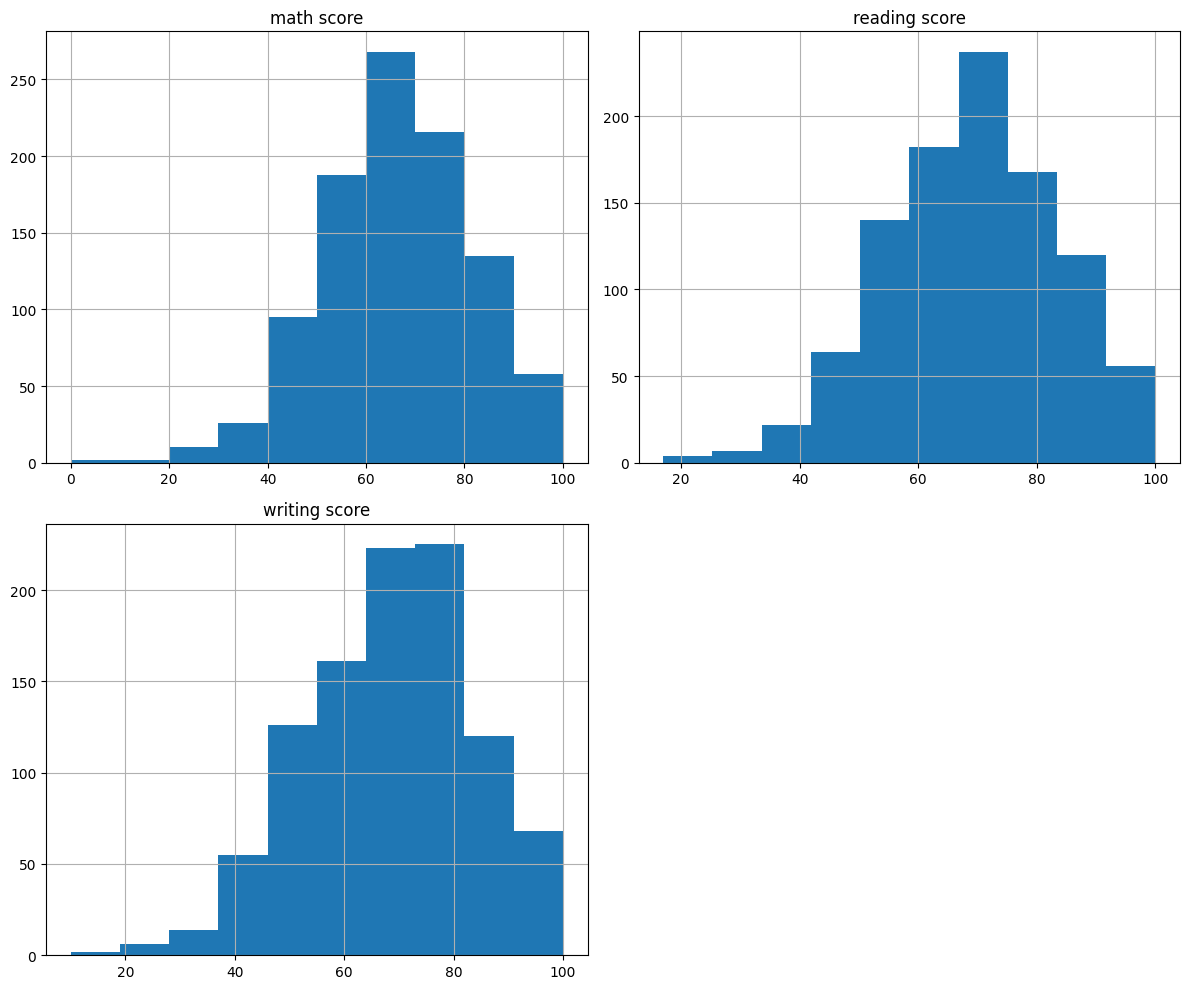

In [7]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


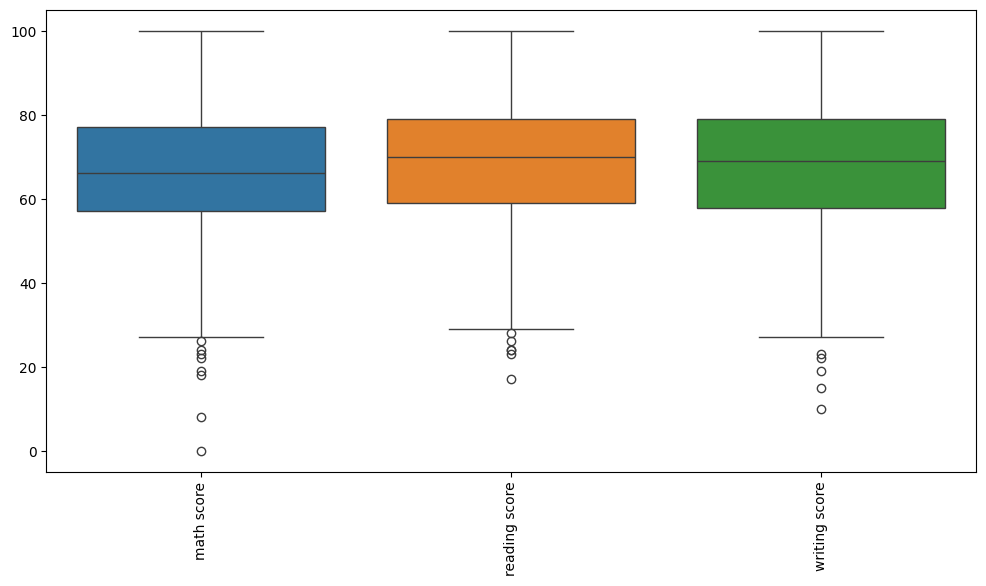

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()


In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_flags = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_flags[col + "_outlier"] = ((df[col] < lower) | (df[col] > upper))

outlier_flags.head()


,math score_outlier,reading score_outlier,writing score_outlier
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [10]:
outlier_flags.sum()


,0
math score_outlier,8
reading score_outlier,6
writing score_outlier,5


In [11]:
df["has_outlier"] = outlier_flags.any(axis=1)
df["has_outlier"].value_counts()


,count
has_outlier,
False,988
True,12


In [12]:
df["has_outlier"] = outlier_flags.any(axis=1)
df["has_outlier"].value_counts()


,count
has_outlier,
False,988
True,12


In [13]:
df_cleaned = df[~df["has_outlier"]]
print("Old Shape:", df.shape)
print("New Shape:", df_cleaned.shape)


Old Shape: (1000, 9)
New Shape: (988, 9)


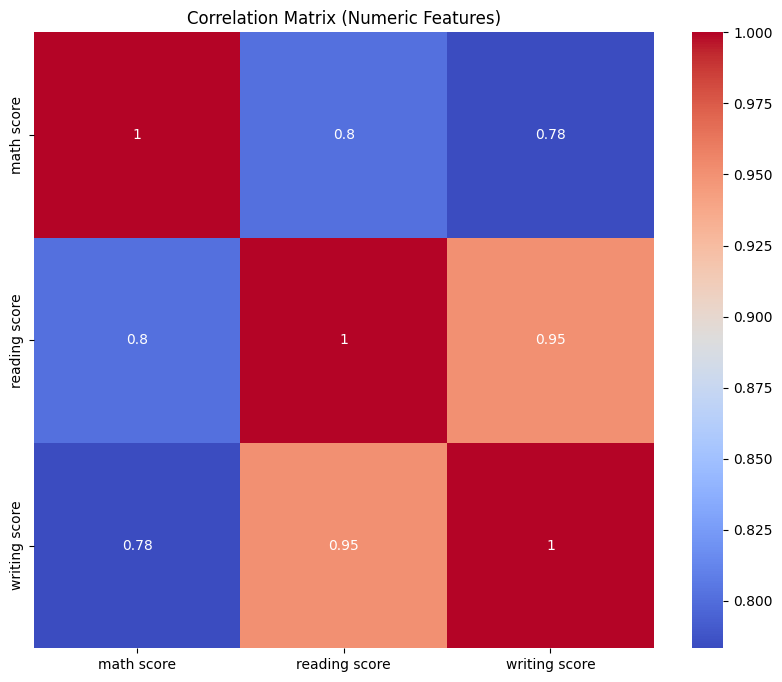

In [16]:
plt.figure(figsize=(10,8))

numeric_df = df_cleaned.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()



In [18]:
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


In [19]:
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>